# CVB Spectral Color Conversion Example

This notebook demonstrates how to load a spectral cube, normalize it using white and black references, convert it to Lab and RGB images, and visualize the results using matplotlib.

## 1. Import Required Libraries

In [1]:
import cvb
import cvb.spectral
import numpy as np
import os
import matplotlib.pyplot as plt

## 2. Define Data Paths

In [2]:
data_root = os.path.join(cvb.install_path(), "tutorial", "Spectral", "Images", "Color")

object_header = os.path.join(data_root, "ColorCube.hdr")
object_binary = os.path.join(data_root, "ColorCube.bin")

white_ref_header = os.path.join(data_root, "WhiteCube.hdr")
white_ref_binary = os.path.join(data_root, "WhiteCube.bin")

black_ref_header = os.path.join(data_root, "DarkCube.hdr")
black_ref_binary = os.path.join(data_root, "DarkCube.bin")

print("Object cube:", object_header)
print("White reference:", white_ref_header)
print("Black reference:", black_ref_header)

Object cube: C:\W\STEMMER_IMAGING\tutorial\Spectral\Images\Color\ColorCube.hdr
White reference: C:\W\STEMMER_IMAGING\tutorial\Spectral\Images\Color\WhiteCube.hdr
Black reference: C:\W\STEMMER_IMAGING\tutorial\Spectral\Images\Color\DarkCube.hdr


## 3. Load Spectral Cubes

In [3]:
object_cube = cvb.spectral.Cube(object_header, object_binary)
white_ref = cvb.spectral.Cube(white_ref_header, white_ref_binary)
black_ref = cvb.spectral.Cube(black_ref_header, black_ref_binary)
print("Cubes loaded.")

Cubes loaded.


## 4. Normalize the Object Cube

In [4]:
cube_norm = cvb.spectral.normalize(
    object_cube, white_ref, black_ref, 
    cvb.spectral.NormalizationMethod.AverageReferences1
)
print("Normalization done!")

Normalization done!


## 5. Create Interpolator

In [5]:
interpolator = cvb.spectral.Interpolator(
    cube_norm, 
    cvb.spectral.StdObserver.CIE2006_2deg, 
    cvb.spectral.StdIlluminant.D50, 
    cvb.spectral.InterpolationMethod.Linear
)
print("Interpolator created.")

Interpolator created.


## 6. Convert to Lab and RGB Images

In [6]:
lab_image = cvb.spectral.convert_cube_to_lab(cube_norm, interpolator)
print("Lab calculation done!")

rgb_image = cvb.spectral.convert_lab_to_rgb8(lab_image, interpolator)
print("sRGB calculation done!")

Lab calculation done!
sRGB calculation done!


## 7. Visualize Lab and RGB Images

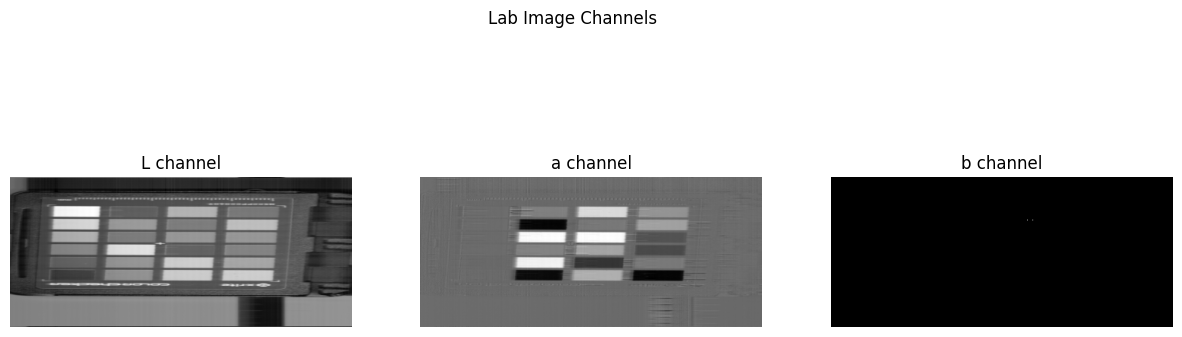

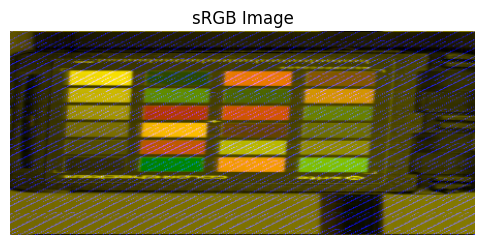

In [7]:
# Convert CVB images to numpy arrays for visualization
lab_np = np.array(lab_image)
rgb_np = np.array(rgb_image)

# Lab image: show L, a, b channels separately
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(lab_np[:, :, 0], cmap='gray')
axs[0].set_title('L channel')
axs[1].imshow(lab_np[:, :, 1], cmap='gray')
axs[1].set_title('a channel')
axs[2].imshow(lab_np[:, :, 2], cmap='gray')
axs[2].set_title('b channel')
for ax in axs:
    ax.axis('off')
plt.suptitle("Lab Image Channels")
plt.show()

# RGB image
plt.figure(figsize=(6, 6))
plt.imshow(rgb_np)
plt.axis('off')
plt.title("sRGB Image")
plt.show()